In [1]:
import pandas as pd
import numpy as np
import math
import sys
sys.path.append('scripts/')
from ts_utils import *
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

RANDOM_STATE = 42

import warnings
warnings.filterwarnings('ignore')

In [2]:
ts = pd.read_csv('data/3 Alaskan Moose Population Data.csv', index_col='Year')
ts.index = pd.to_datetime(ts.index, format="%Y")
data = ts.copy()

In [3]:
data.head()

,FairbanksPop,MooseHarvest,TotalMoose,AvgSnow,WolfPop,WolfControl
Year,,,,,,
1965-01-01,50043,335,23300,25,200,1
1966-01-01,52805,216,17200,28,215,1
1967-01-01,53037,299,14300,23,230,1
1968-01-01,52968,377,13000,36,250,1
1969-01-01,49416,376,12400,20,270,1


In [4]:
# 42 Years of data
data.shape

(42, 6)

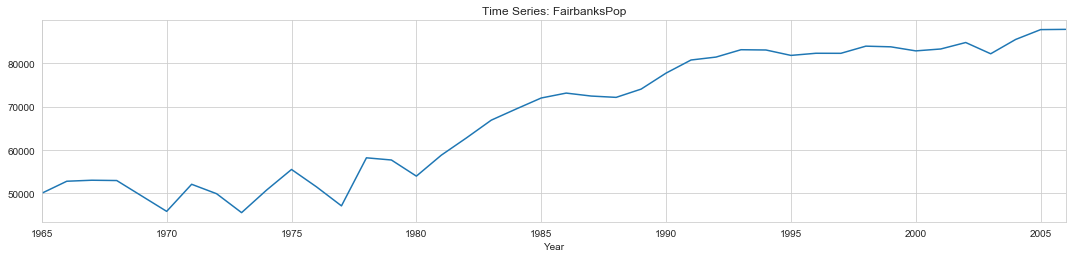

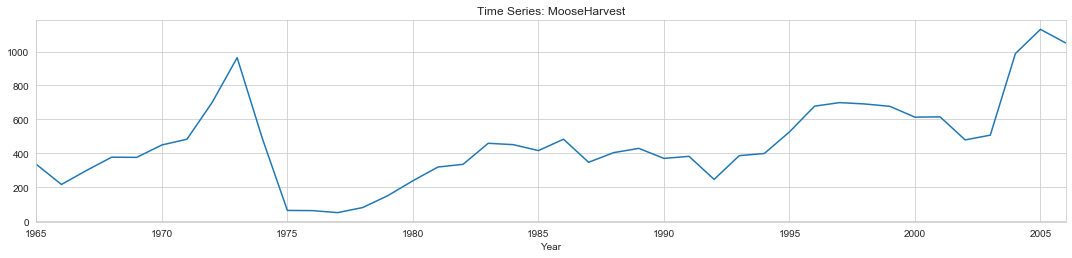

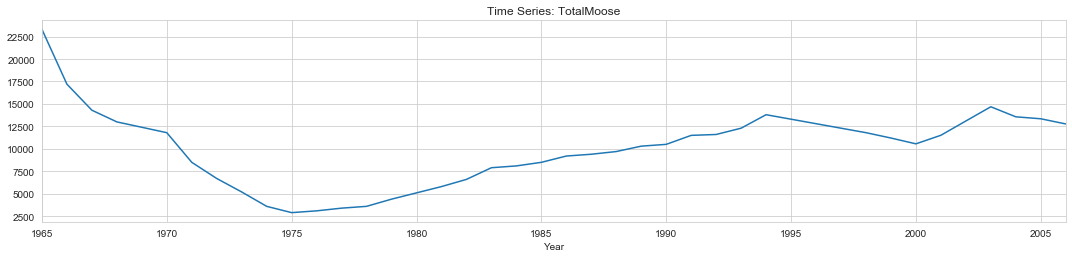

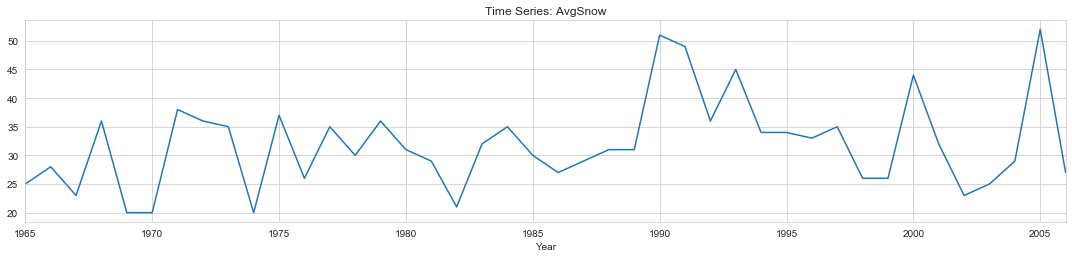

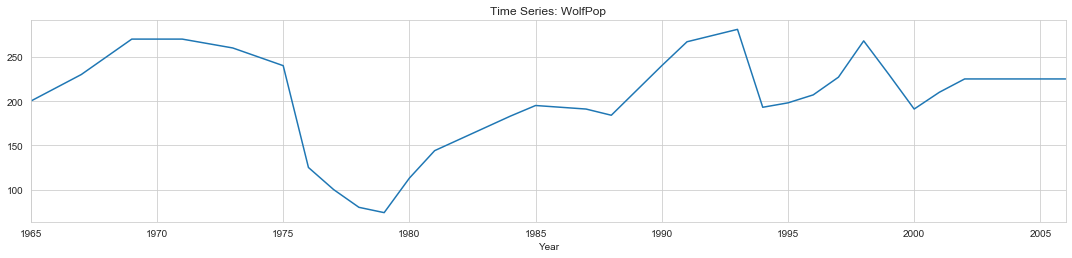

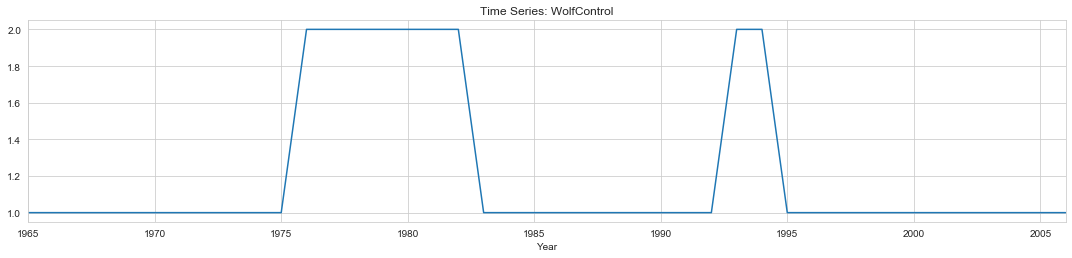

In [5]:
for col in data.columns:
    plot_ts(data[col], dist = False, pacf=False, acf=False)

# Stationarity
If a trend and/or seasonality component is found remove the corresponding estimations
</br>

Use the residual process taken from the time series decomposition
</br>

Differencing the Series until stationary, Take the log of the series and/or Take the nth root of the series
</br>

If count data take sqrt(count+3/4)

# Test For Stationarity
Mean and variance do change over time
</br>

Doesn't have any trend or seasonal effects
</br>

Plot Distribution, Compare summary statistics, ADF test, plot ACF/PACF

# ADF Test
Augmented Dickey-Fuller test
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
</br>

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

In [6]:
for col in data.columns:
    adfuller_test(data[col], name=col)



    Augmented Dickey-Fuller Test on "FairbanksPop" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.0587
 No. Lags Chosen       = 2
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.9534. Weak evidence to reject the Null Hypothesis.
 => Series is likely Non-Stationary.


    Augmented Dickey-Fuller Test on "MooseHarvest" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3518
 No. Lags Chosen       = 0
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.6052. Weak evidence to reject the Null Hypothesis.
 => Series is likely Non-Stationary.


    Augmented Dickey-Fuller Test on "TotalMoose" 
    ---------------------------------------------

# ACF/PACF Plot
Autocorrelation function (ACF) at lag k, this is the correlation between series values that are k intervals apart.
</br>

A partial autocorrelation (PACF) is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags.

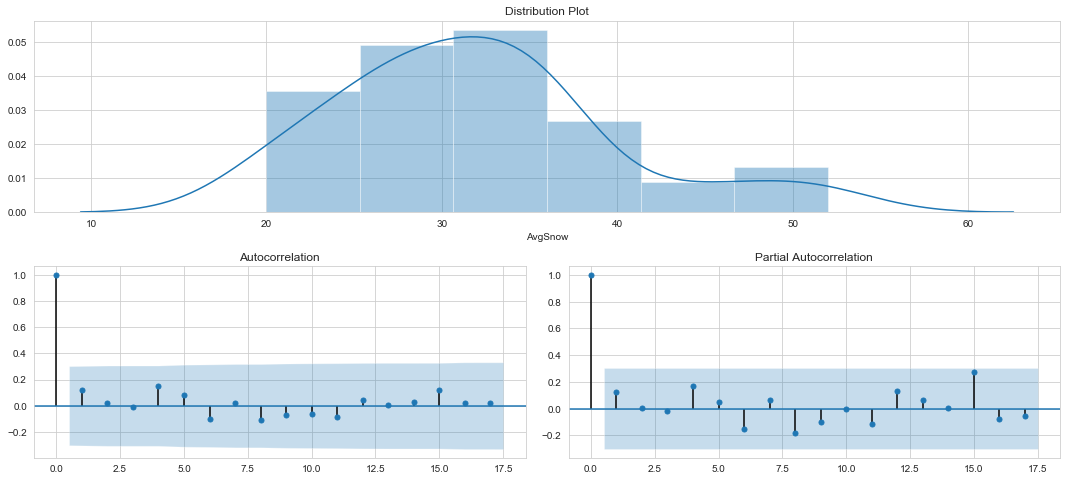

In [7]:
# Only the variable AvgSnow may be stationary - ACF, PACF show stationarity
plot_ts(data['AvgSnow'], ts=False)

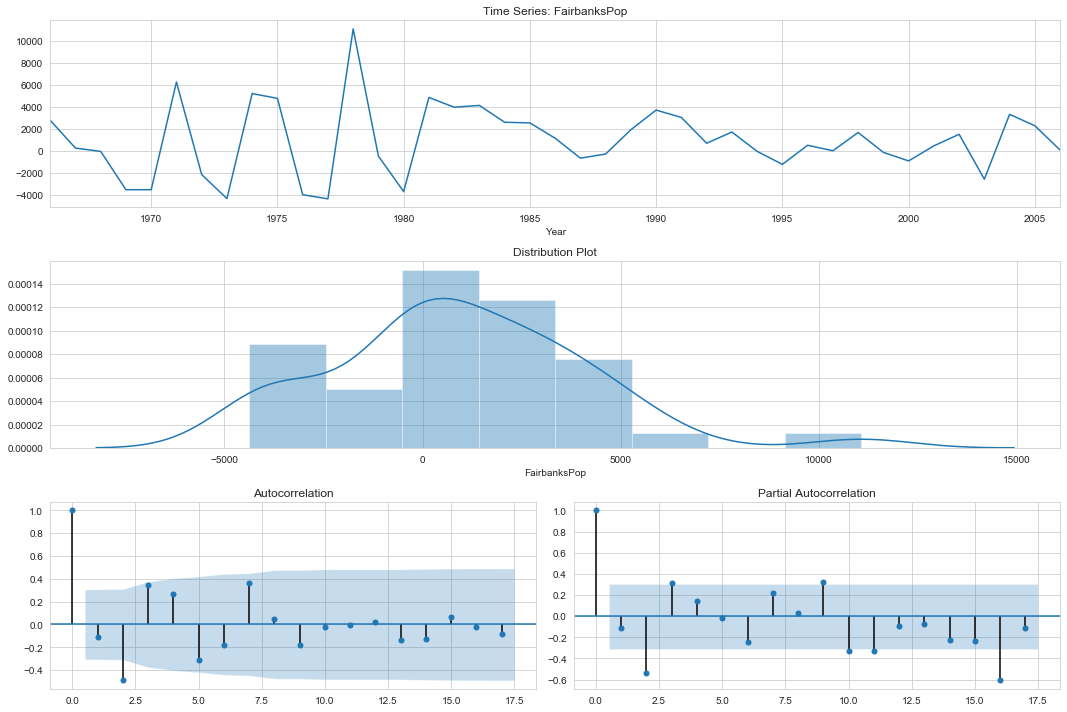

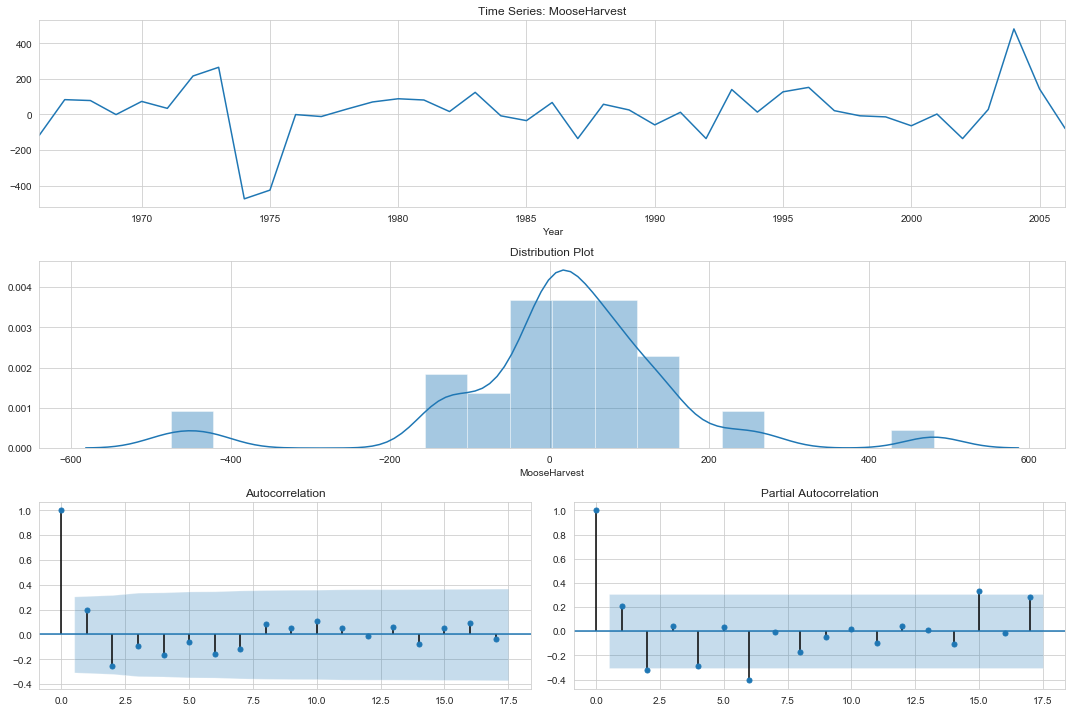

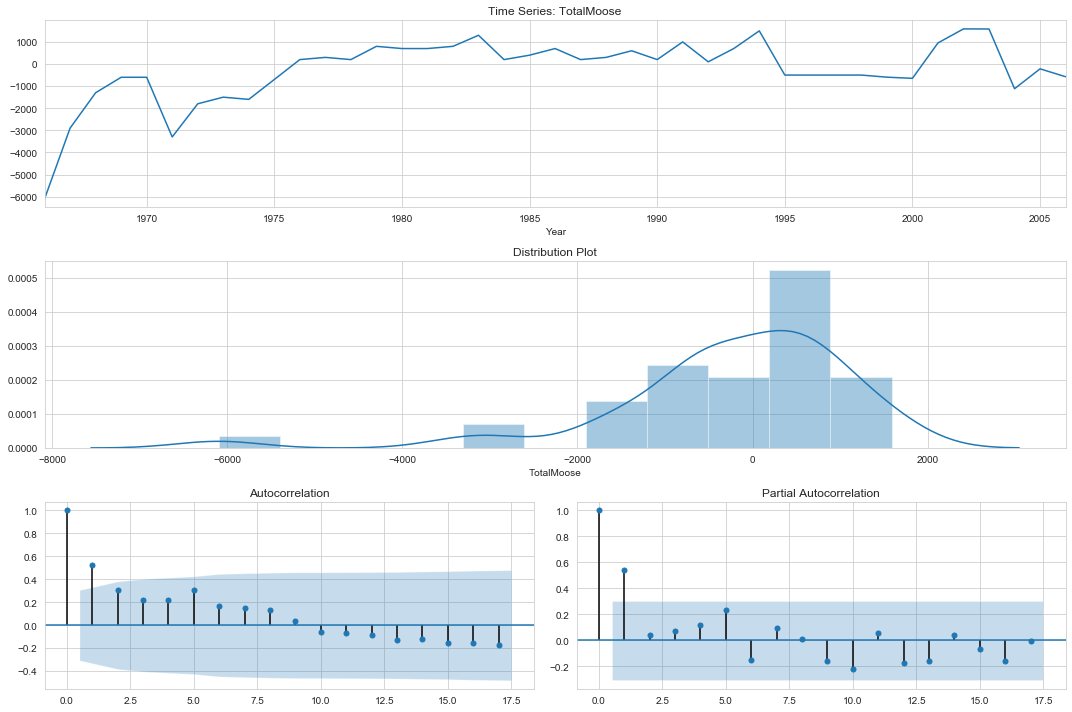

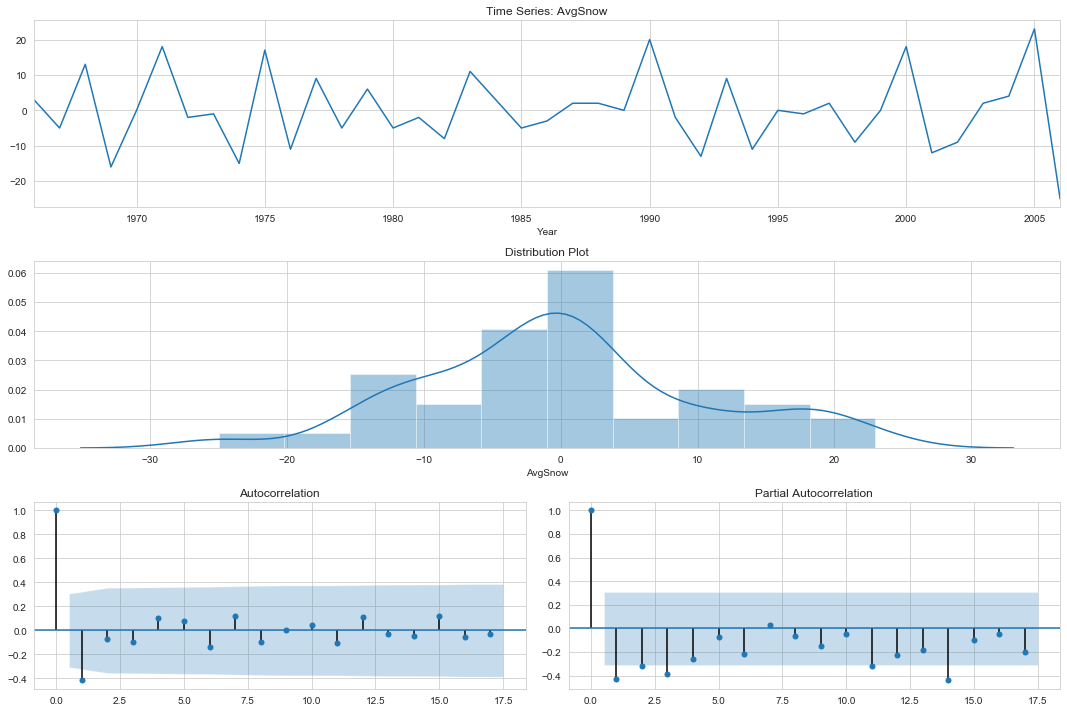

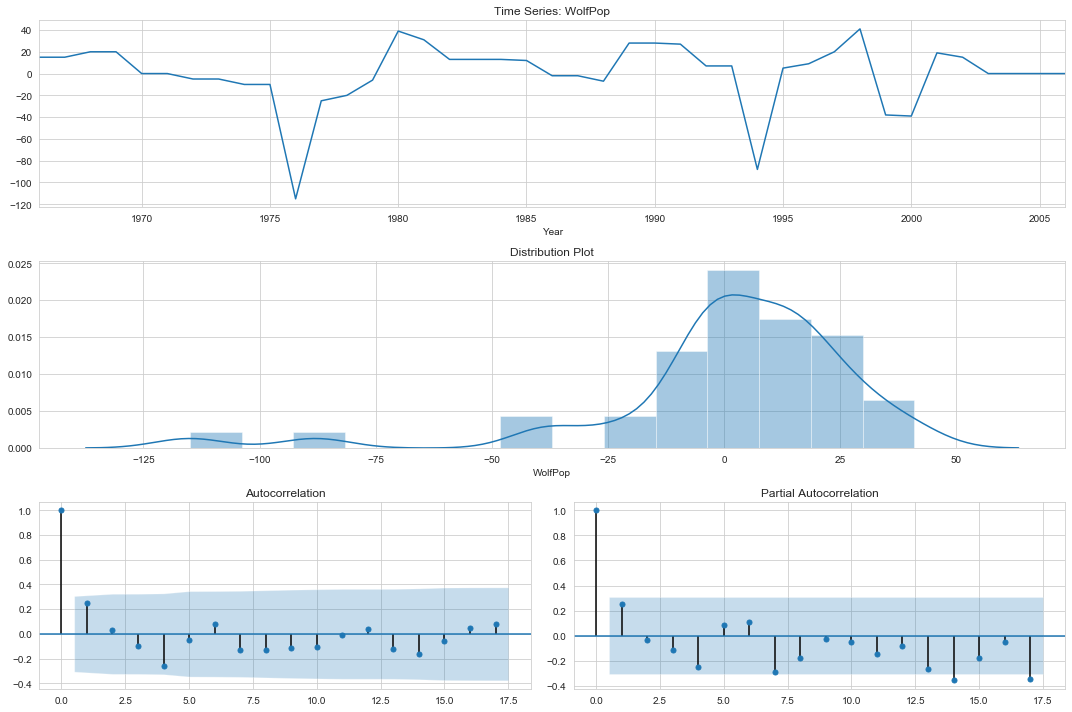

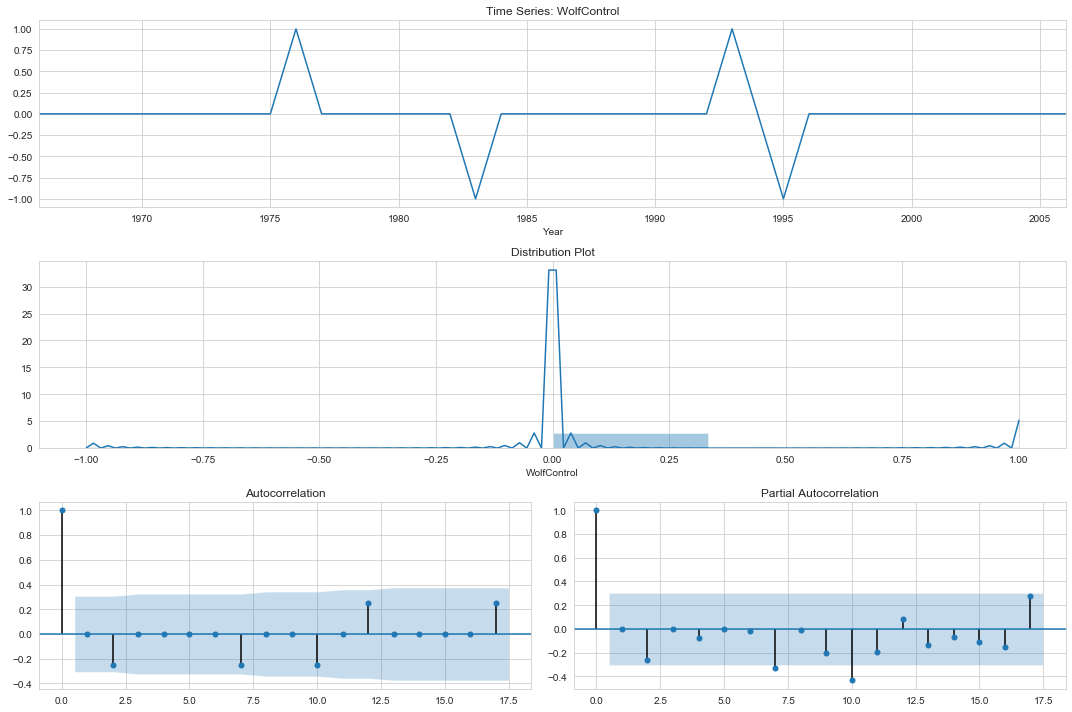

In [8]:
# Take first order difference of all cols
cols = [col for col in data.columns]
data[cols] = data[cols].diff()
for col in cols:
    plot_ts(data[col].dropna())

In [9]:
for col in cols:
    adfuller_test(data[col].dropna(), name=col)



    Augmented Dickey-Fuller Test on "FairbanksPop" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8414
 No. Lags Chosen       = 1
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series may be Stationary.


    Augmented Dickey-Fuller Test on "MooseHarvest" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0501
 No. Lags Chosen       = 0
 Critical value 1%     = -3.606
 Critical value 5%     = -2.937
 Critical value 10%    = -2.607
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series may be Stationary.


    Augmented Dickey-Fuller Test on "TotalMoose" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.

### Split and Compare Summary Statistics

In [10]:
for col in data.columns:
    X = data[col].dropna()
    split = round(len(X) * 0.5)
    X1, X2 = X[0:split], X[split:]
    mean = []
    var = []
    mean.append('{:.5f}'.format(X1.mean()))
    mean.append('{:.5f}'.format(X2.mean()))
    var.append('{:.5f}'.format(X1.var()))
    var.append('{:.5f}'.format(X2.var()))
    print('\n' + col)
    print(pd.DataFrame([mean,var], index=['mean','variance'], columns=['Part 1','Part 2']))


FairbanksPop
                  Part 1         Part 2
mean          1097.05000      753.00000
variance  19041753.20789  2508373.80000

MooseHarvest
               Part 1       Part 2
mean          4.05000     30.23810
variance  31286.57632  18553.59048

TotalMoose
                 Part 1        Part 2
mean         -740.00000     203.47619
variance  3201473.68421  662332.06190

AvgSnow
            Part 1     Part 2
mean       0.25000   -0.14286
variance  95.35526  130.02857

WolfPop
             Part 1     Part 2
mean       -0.25000    1.42857
variance  995.67105  794.55714

WolfControl
           Part 1   Part 2
mean      0.00000  0.00000
variance  0.10526  0.10000


## Granger’s Causality Test
Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.
I.e. the past values of time series (X) do not cause the other series (Y).
</br>

if the p-value obtained from the test are less than the significance level of 0.05, then, you can safely reject the null hypothesis and say that the past values of time series (X) do cause the other series (Y)

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests

def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=1, verbose=False):    
    """
    Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      - pandas dataframe containing the time series variables
    variables - list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data.dropna(), variables = data.columns, maxlag=12)   

,FairbanksPop_x,MooseHarvest_x,TotalMoose_x,AvgSnow_x,WolfPop_x,WolfControl_x
FairbanksPop_y,1.0,0.0000,0.0000,0.0000,0.0000,0.0576
MooseHarvest_y,0.0,1.0000,0.0000,0.0000,0.0000,0.0002
TotalMoose_y,0.0,0.0000,1.0000,0.0000,0.0000,0.0000
AvgSnow_y,0.0,0.0315,0.0000,1.0000,0.0301,0.0099
WolfPop_y,0.0,0.0000,0.0000,0.0009,1.0000,0.0000
WolfControl_y,0.0,0.0000,0.0001,0.0000,0.0000,1.0000


## Cointegration Test
Helps to establish the presence of a statistically significant connection between two or more time series.
</br>

When you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

If all the eigen values are less than 1 in modulus => VAR model is stationary and can be built and used for forecasting after other diagnostic checks.

In [12]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(data, alpha=0.05, lags=1): 
    """
    Perform Johanson's Cointegration Test and Report Summary
    
    data - time series data
    """
    out = coint_johansen(data,-1,4)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    eigenvalues = out.eig
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif - Eigenvalues \n', '--'*20)
    for col, trace, cvt, eig in zip(data.columns, traces, cvts, eigenvalues):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt,\
              " - ", adjust(round(eig, 4), 5))

cointegration_test(data.dropna())

Name   ::  Test Stat > C(95%)    =>   Signif - Eigenvalues 
 ----------------------------------------
FairbanksPop ::  425.18    > 83.9383   =>   True  -  0.9998
MooseHarvest ::  114.65    > 60.0627   =>   True  -  0.8068
TotalMoose ::  55.46     > 40.1749   =>   True  -  0.553
AvgSnow ::  26.47     > 24.2761   =>   True  -  0.3837
WolfPop ::  9.04      > 12.3212   =>   False  -  0.2206
WolfControl ::  0.07      > 4.1296    =>   False  -  0.002


# Time Series Model
#### Autoregressive Integrated Moving Average (ARIMA)
Made up of - Autoregression (AR) - Model parameter p - suitable for univariate ts without trend and seasonal components.
</br>

Moving Average (MA) - Model parameter q - suitable for univariate time series without trend and seasonal components.
</br>

ARIMA combines both with the addition of parameter d -differencing pre-processing step - suitable for univariate time series with trend and without seasonal components.
</br>

#### Seasonal Autoregressive Integrated Moving-Average (SARIMA)
SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period).
</br>
#### ARIMA/SARIMA with Exogenous Regressors
Extension - includes modeling of exogenous variables, which are parallel input sequences that have observations at the same time steps as the original series.
#### Vector Autoregression (VAR)
#### Generalized Autoregressive Conditionally Heteroskedastic (GARCH)
#### Facebook Prophet
#### LSTM/CNN
#### Simple Exponential Smoothing (SES) 
models the next time step as an exponentially weighted linear function of observations at prior time steps.
</br>

#### Holt Winter’s Exponential Smoothing (HWES)
Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

## VAR

In [28]:
from statsmodels.tsa.statespace.varmax import VARMAX

cols=['TotalMoose','WolfPop','AvgSnow','MooseHarvest']

for lag in [1,2,3,4,5,6]:
    
    result = VARMAX(data[cols].dropna(), order=(lag,0)).fit()
    
    lag_AIC, lag_BIC = 0, 0
    min_AIC, min_BIC = float("inf"), float("inf")
    if result.aic < min_AIC:
        lag_AIC = lag
        min_AIC = result.aic
    if result.bic < min_BIC:
        lag_BIC = lag
        min_BIC = result.bic
    
print('Min AIC: ', min_AIC, 'At Lag: ', lag_AIC)
print('Min BIC: ', min_BIC, 'At Lag: ', lag_BIC)

Min AIC:  1991.3631816068523 At Lag:  6
Min BIC:  2179.856108944326 At Lag:  6


In [29]:
lags = 3
model = VARMAX(data[cols].dropna(), order=(lags,0))
model_cols = model.endog_names
result = model.fit()
result.summary()

Dep. Variable:,"['TotalMoose', 'WolfPop', 'AvgSnow', 'MooseHarvest']",No. Observations:,41
Model:,VAR(3),Log Likelihood,-916.777
,+ intercept,AIC,1957.554
Date:,"Fri, 29 Nov 2019",BIC,2063.795
Time:,17:09:47,HQIC,1996.241
Sample:,01-01-1966,,
,- 01-01-2006,,
Covariance Type:,opg,,
Ljung-Box (Q):,"95.91, 35.91, 44.20, 55.74",Jarque-Bera (JB):,"7.70, 0.80, 3.71, 1.06"
Prob(Q):,"0.00, 0.65, 0.30, 0.05",Prob(JB):,"0.02, 0.67, 0.16, 0.59"
Heteroskedasticity (H):,"0.74, 1.19, 1.44, 0.60",Skew:,"-0.87, -0.33, 0.74, -0.39"


## Residual Analysis
Test for:

Serial Correlations - Durbin Watson

Normality

Stability - All eigenvalues of the companion matrix are less than 1

Granger Causality - Wald Test

## Durbin Watson Test

The null hypothesis of the test is that there is no serial correlation.

This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. 

The closer to 4, the more evidence for negative serial correlation.

In [30]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(result.resid)

for col, val in zip(model_cols, out):
    print(col, ':', round(val, 2))

TotalMoose : 1.77
WolfPop : 1.89
AvgSnow : 2.11
MooseHarvest : 2.15


### Ljung-Box test

Null hypothesis is no serial correlation.
P Values for each lag

In [31]:
pd.DataFrame(result.test_serial_correlation(method='ljungbox', lags=lags)[:,1], index=model_cols, columns=['Lag '+str(i) for i in range(1, model.k_ar+1)])

,Lag 1,Lag 2,Lag 3
TotalMoose,0.402156,0.469812,0.204886
WolfPop,0.999656,0.997180,0.944602
AvgSnow,0.838456,0.434050,0.365847
MooseHarvest,0.419687,0.682249,0.719552


### Normality

In [32]:
# H0 data is normally distributed
pd.DataFrame(np.round(result.test_normality(method='jarquebera'), 5), index=model_cols, columns = ['JB','JBpv','skew','kurtosis'])

,JB,JBpv,skew,kurtosis
TotalMoose,7.70064,0.02127,-0.87434,4.20409
WolfPop,0.80181,0.66971,-0.33260,2.83611
AvgSnow,3.70891,0.15654,0.73672,3.00719
MooseHarvest,1.05514,0.59004,-0.38876,3.11450


### Granger Causality

In [33]:
grangers_causation_matrix(result.resid, variables=model_cols)

,TotalMoose_x,WolfPop_x,AvgSnow_x,MooseHarvest_x
TotalMoose_y,1.0000,0.8665,0.5342,0.7802
WolfPop_y,0.4999,1.0000,0.7163,0.9425
AvgSnow_y,0.3073,0.6411,1.0000,0.7718
MooseHarvest_y,0.7299,0.4326,0.3804,1.0000


##### The null hypothesis is of no heteroskedasticity. - 'increasing' is that the variance is not increasing throughout the sample

In [34]:
pd.DataFrame(np.round(result.test_heteroskedasticity(method='breakvar', alternative='increasing'), 4), index = model_cols, columns = ['test statistic','Pvalue'])

,test statistic,Pvalue
TotalMoose,0.7448,0.7056
WolfPop,1.1916,0.3737
AvgSnow,1.4350,0.2540
MooseHarvest,0.6036,0.8220


In [35]:
cointegration_test(result.resid, lags=lags-1)

Name   ::  Test Stat > C(95%)    =>   Signif - Eigenvalues 
 ----------------------------------------
TotalMoose ::  47.21     > 40.1749   =>   True  -  0.4729
WolfPop ::  24.16     > 24.2761   =>   False  -  0.302
AvgSnow ::  11.22     > 12.3212   =>   False  -  0.1736
MooseHarvest ::  4.35      > 4.1296    =>   True  -  0.1139


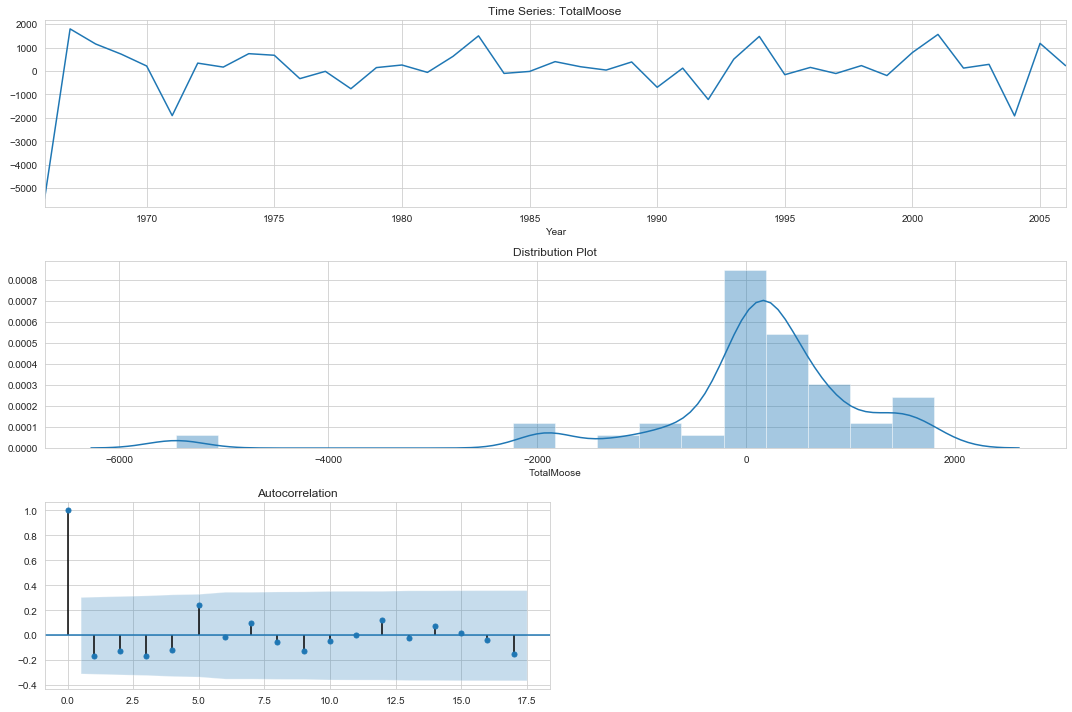

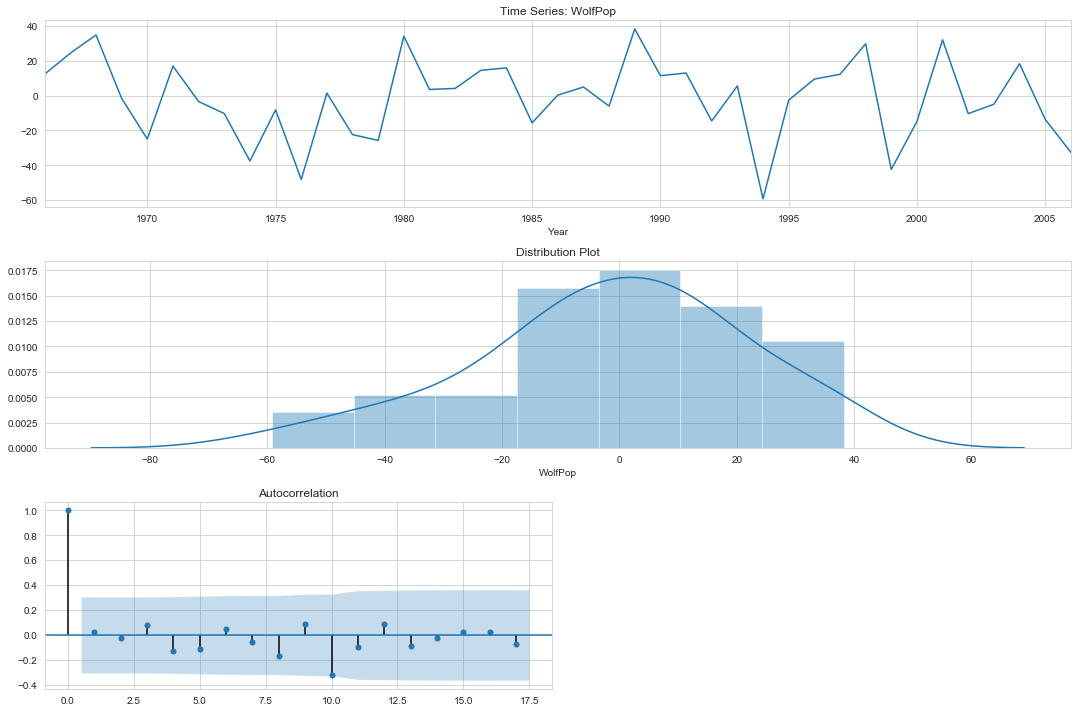

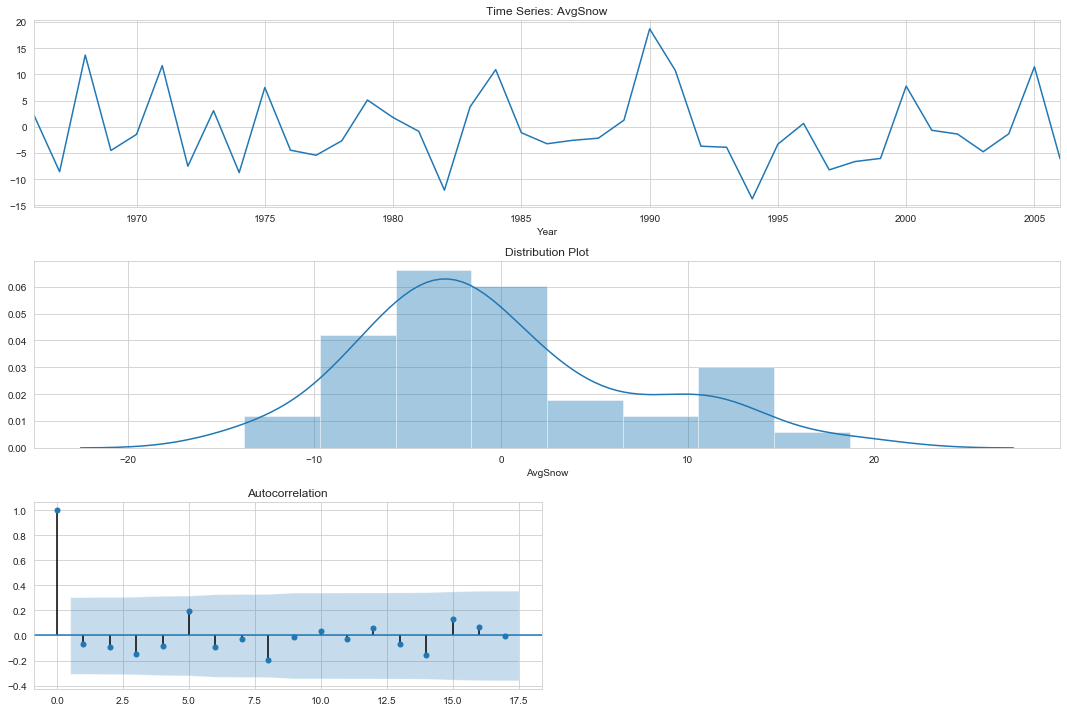

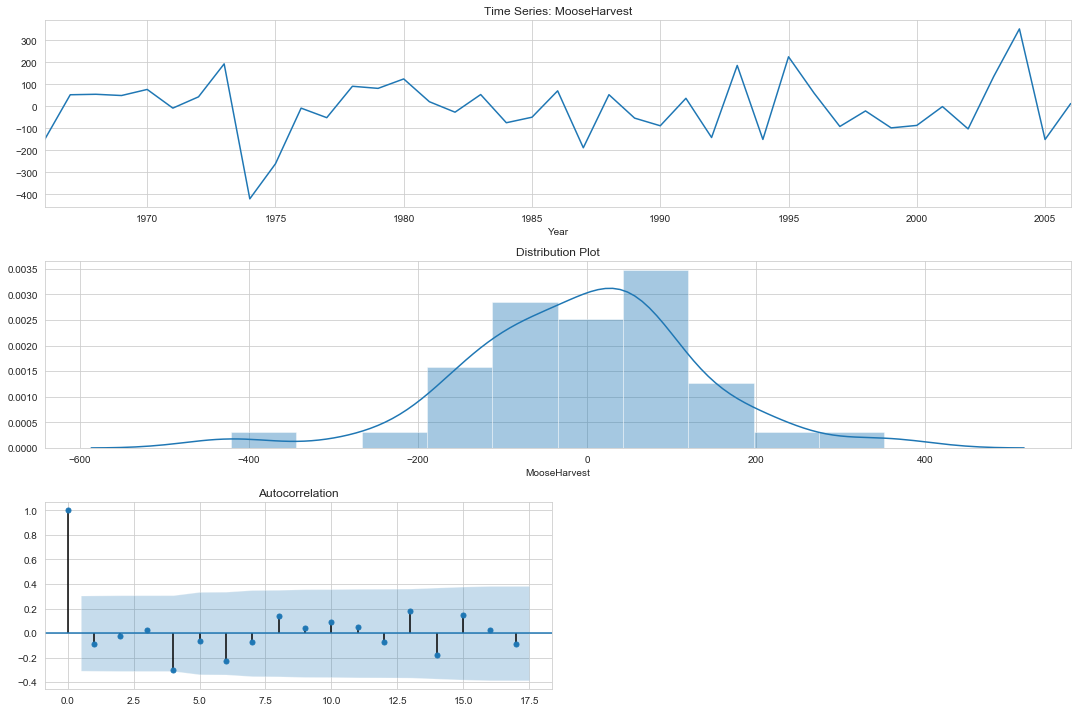

In [36]:
#Confirm normality check
for col in result.resid.columns:
    plot_ts(result.resid[col], pacf=False)

## Forecast Plots

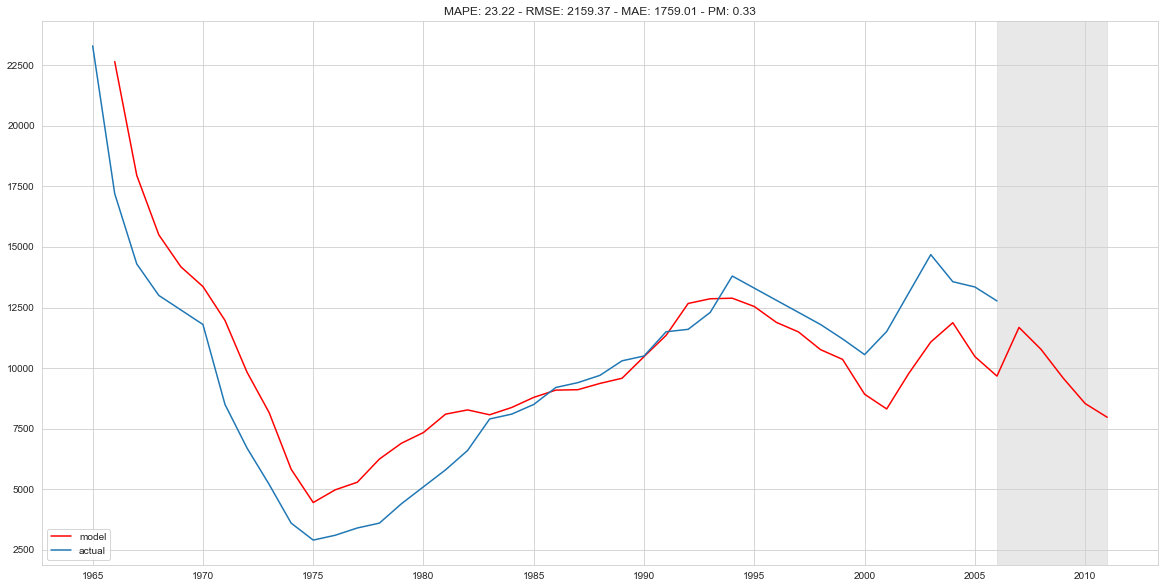

In [37]:
plot_VAR_forecast(ts['TotalMoose'], result, 5, d=1)

## Error Measures

Mean Absolute Percentage Error (MAPE) - Percentage error
MAPE also cannot be used when the time series can take zero values.
</br>

MAE - The mean absolute error, or MAE, is calculated as the average of the forecast error values.
</br>

MSE/RMSE, is calculated as the average of the squared forecast error values.
MSE/RMSE is scale-dependent. Can't be used for comparing accuracy across time series with different scales.

PM (Performance Measure) - Measure the proportion of the variability in the prediction and the observed data - closer to 0 the better

#### X% MAPE implies the model is about 100-X% accurate in predicting the next N observations.